In [402]:
import datetime as datetime
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Forbes billionaires (1996-2014)

In [403]:
df = pd.read_csv('billionaires.csv')
df.head(10)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.country code,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,United States,USA,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,United States,USA,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,United States,USA,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,United States,USA,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,United States,USA,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True
5,Carlos Slim Helu,2,2014,1990,Telmex,founder,Communications,privatization,74,male,Mexico,MEX,0.000000e+00,Latin America,privatized and resources,72.0,Non-Traded Sectors,True,Media,not inherited,True,True
6,Oeri Hoffman and Sacher,3,1996,1896,F. Hoffmann-La Roche,NaN,pharmaceuticals,new,0,NaN,Switzerland,CHE,3.300000e+11,Europe,inherited,13.1,New Sectors,True,Technology-Medical,3rd generation,True,True
7,Paul Allen,3,2001,1975,Microsoft,founder,technology,new,48,male,United States,USA,1.060000e+13,North America,founder non-finance,30.4,New Sectors,True,Technology-Computer,not inherited,True,True
8,Amancio Ortega,3,2014,1975,Zara,founder,Fashion,new,77,male,Spain,ESP,0.000000e+00,Europe,founder non-finance,64.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
9,Lee Shau Kee,4,1996,1976,Henderson Land Development,founder/chairman,real estate,new,68,male,Hong Kong,HKG,1.600000e+11,East Asia,self-made finance,12.7,Financial,True,Real Estate,not inherited,True,True


Dataset Information

In [404]:
df.columns

Index(['name', 'rank', 'year', 'company.founded', 'company.name', 'company.relationship', 'company.sector', 'company.type', 'demographics.age', 'demographics.gender', 'location.citizenship', 'location.country code', 'location.gdp', 'location.region', 'wealth.type', 'wealth.worth in billions', 'wealth.how.category', 'wealth.how.from emerging', 'wealth.how.industry', 'wealth.how.inherited', 'wealth.how.was founder', 'wealth.how.was political'], dtype='object')

In [405]:
df.shape

(2614, 22)

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2576 non-null   object 
 5   company.relationship      2568 non-null   object 
 6   company.sector            2591 non-null   object 
 7   company.type              2578 non-null   object 
 8   demographics.age          2614 non-null   int64  
 9   demographics.gender       2580 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              2614 non-null   float64
 13  location.region           2614 non-null   object 
 14  wealth.t

In [407]:
df.describe()

,rank,year,company.founded,demographics.age,location.gdp,wealth.worth in billions
count,2614.000000,2614.000000,2614.000000,2614.000000,2.614000e+03,2614.000000
mean,599.672533,2008.411630,1924.711936,53.341239,1.769103e+12,3.531943
std,467.885695,7.483598,243.776546,25.333320,3.547083e+12,5.088813
min,1.000000,1996.000000,0.000000,-42.000000,0.000000e+00,1.000000
25%,215.000000,2001.000000,1936.000000,47.000000,0.000000e+00,1.400000
50%,430.000000,2014.000000,1963.000000,59.000000,0.000000e+00,2.000000
75%,988.000000,2014.000000,1985.000000,70.000000,7.250000e+11,3.500000
max,1565.000000,2014.000000,2012.000000,98.000000,1.060000e+13,76.000000


Сheck for empty values

In [408]:
df.isnull().sum()

name                         0
rank                         0
year                         0
company.founded              0
company.name                38
company.relationship        46
company.sector              23
company.type                36
demographics.age             0
demographics.gender         34
location.citizenship         0
location.country code        0
location.gdp                 0
location.region              0
wealth.type                 22
wealth.worth in billions     0
wealth.how.category          1
wealth.how.from emerging     0
wealth.how.industry          1
wealth.how.inherited         0
wealth.how.was founder       0
wealth.how.was political     0
dtype: int64

Filling in the empty values

In [409]:
df['company.name'] = df['company.name'].fillna('Unknown')
df['company.relationship'] = df['company.relationship'].fillna('Unknown')
df['company.type'] = df['company.type'].fillna(df['company.type'].mode()[0])
df['company.sector'] = df['company.sector'].fillna('Unknown')
df['demographics.gender'] = df['demographics.gender'].fillna(df['demographics.gender'].mode()[0])
df['wealth.type'] = df['wealth.type'].fillna(df['wealth.type'].mode()[0])
df['wealth.how.category'] = df['wealth.how.category'].fillna("0")
df['wealth.how.industry'] = df['wealth.how.industry'].fillna('Other')

Filling in the value correctly

In [410]:
df['company.type'] = df['company.type'].replace('neew',df['company.type'].mode()[0])
df['company.type'] = df['company.type'].replace(' new',df['company.type'].mode()[0])
df['company.type'] = df['company.type'].replace('new ',df['company.type'].mode()[0])
df['company.type'] = df['company.type'].replace(' acquired', 'acquired')
df['location.region'] = df['location.region'].replace('0', 'Europe')
df['demographics.age'] = df['demographics.age'].replace(0, df['demographics.age'].astype(int).median())
df['demographics.age'] = df['demographics.age'].replace(-42, df['demographics.age'].astype(int).median())
df['demographics.age'] = df['demographics.age'].replace(-7, df['demographics.age'].astype(int).median())
df['company.founded'] = df['company.founded'].replace(0, df['company.founded'].mode()[0])
df["wealth.how.industry"] = df['wealth.how.industry'].replace('0','Other')


Сheck for empty values

In [411]:
df.isnull().sum()

name                        0
rank                        0
year                        0
company.founded             0
company.name                0
company.relationship        0
company.sector              0
company.type                0
demographics.age            0
demographics.gender         0
location.citizenship        0
location.country code       0
location.gdp                0
location.region             0
wealth.type                 0
wealth.worth in billions    0
wealth.how.category         0
wealth.how.from emerging    0
wealth.how.industry         0
wealth.how.inherited        0
wealth.how.was founder      0
wealth.how.was political    0
dtype: int64

Handling Duplicates values

In [412]:
print(df.duplicated().sum())

0


# Manipulate and analyze the data 


Here the grouping of gender by name shows the number of male and female and married couples 

In [413]:
df_g = df[['demographics.gender', 'name']].groupby('demographics.gender').count()
df_g

,name
demographics.gender,
female,249
male,2362
married couple,3


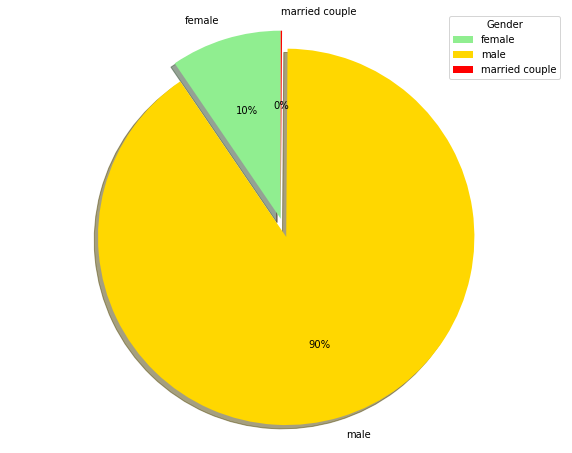

In [414]:
fig , ax = plt.subplots(figsize=[10,8])
mycolors = ["lightgreen", "gold", "red"]
explode=[0,0.1,0]
sizes = df_g['name']
ax.pie(sizes,explode=explode, labels = df_g.index, colors = mycolors,shadow=True,autopct='%.0f%%',startangle=90)
ax.axis('equal')
plt.legend(title='Gender')
plt.show()

The number of billionaires in locations in the dataset

In [415]:
df_location = df[['location.region', 'name']].groupby('location.region').count().rename(columns = {'name':'Number of Billionaires'}).sort_values('Number of Billionaires', ascending=False)
df_location

,Number of Billionaires
location.region,
North America,992
Europe,699
East Asia,535
Latin America,182
Middle East/North Africa,117
South Asia,69
Sub-Saharan Africa,20


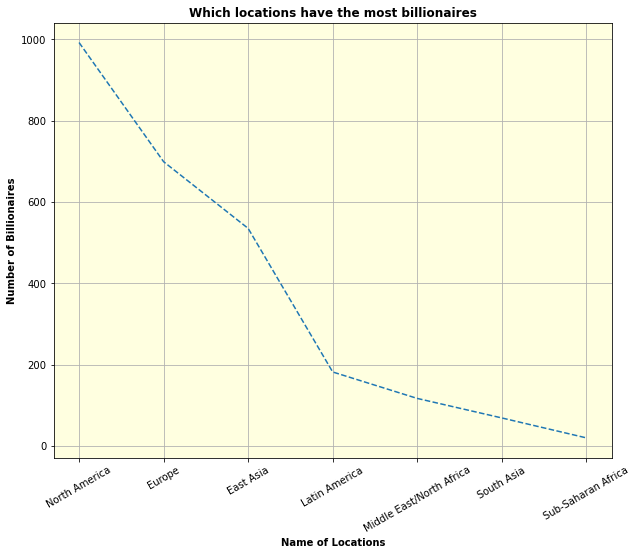

In [416]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(df_location.index, df_location['Number of Billionaires'],'--')
ax.set_xlabel('Name of Locations',fontdict={'size':10,'fontweight':'bold'} )
ax.set_ylabel('Number of Billionaires',fontdict={'size':10,'fontweight':'bold'})
ax.set_title('Which locations have the most billionaires',fontdict={'size':12,'fontweight':'bold'})
ax.grid(zorder=0)
ax.set_facecolor('lightyellow')
plt.xticks(rotation=30)
plt.show()

Number of Billionaires in each country 

In [417]:
df_country = df[['location.citizenship', 'name']].groupby('location.citizenship').count().sort_values('name', ascending=False).reset_index().rename(columns = {'name':'Number of Billionaires','location.citizenship':'Country'})
df_country

,Country,Number of Billionaires
0,United States,903
1,Germany,160
2,China,153
3,Russia,119
4,Japan,96
5,Brazil,81
6,Hong Kong,77
7,France,72
8,United Kingdom,65
9,India,63


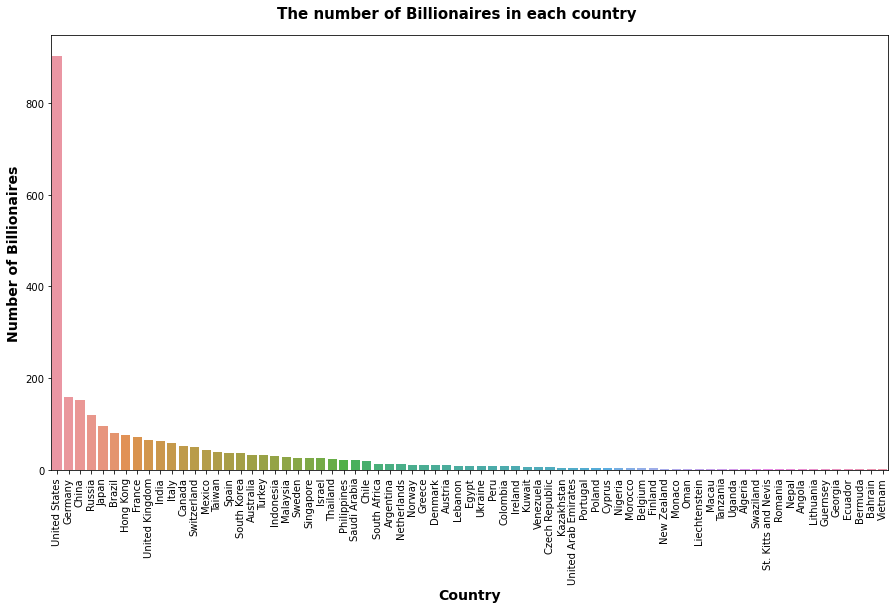

In [418]:
fig,ax= plt.subplots(figsize=[15,8])
sns.barplot(x='Country',y='Number of Billionaires',data=df_country)
plt.suptitle('The number of Billionaires in each country',fontsize=15, fontweight='bold', position=(0.5,0.93))
plt.ylabel('Number of Billionaires',fontdict={'size':14,'fontweight':'bold'})
plt.xlabel('Country',fontdict={'size':14,'fontweight':'bold'})
plt.xticks(rotation=90)
plt.show()

The fortune of billionaires in every year

Here I took the TOP 10 fortune billionaires in each year, and the chart shows more than 10 name billionaires, which means every year other millionaires joined the TOP 10

In [419]:
sub = df.loc[:,['year','wealth.worth in billions','name']]
sub = sub.groupby(['year','wealth.worth in billions','name']).max()
sub = sub.groupby('year').tail(10)
sub

Empty DataFrame
Columns: []
Index: [(1996, 9.0, Hans and Gad Rausing), (1996, 9.0, Theo and Karl Albrecht), (1996, 9.2, Yoshiaki Tsutsumi), (1996, 10.6, Li Ka-shing), (1996, 11.2, Walter Thomas and Raymond Kwok), (1996, 12.2, Tsai Wan-lin), (1996, 12.7, Lee Shau Kee), (1996, 13.1, Oeri Hoffman and Sacher), (1996, 15.0, Warren Buffett), (1996, 18.5, Bill Gates), (2001, 18.5, Helen Walton), (2001, 18.6, S Robson Walton), (2001, 18.7, John Walton), (2001, 18.8, Jim Walton), (2001, 20.0, Prince Alwaleed Bin Talal Alsaud), (2001, 25.0, Theo and Karl Albrecht), (2001, 26.0, Larry Ellison), (2001, 30.4, Paul Allen), (2001, 32.3, Warren Buffett), (2001, 58.7, Bill Gates), (2014, 34.7, Jim Walton), (2014, 36.7, Christy Walton), (2014, 38.0, Sheldon Adelson), (2014, 40.0, Charles Koch), (2014, 40.0, David Koch), (2014, 48.0, Larry Ellison), (2014, 58.2, Warren Buffett), (2014, 64.0, Amancio Ortega), (2014, 72.0, Carlos Slim Helu), (2014, 76.0, Bill Gates)]

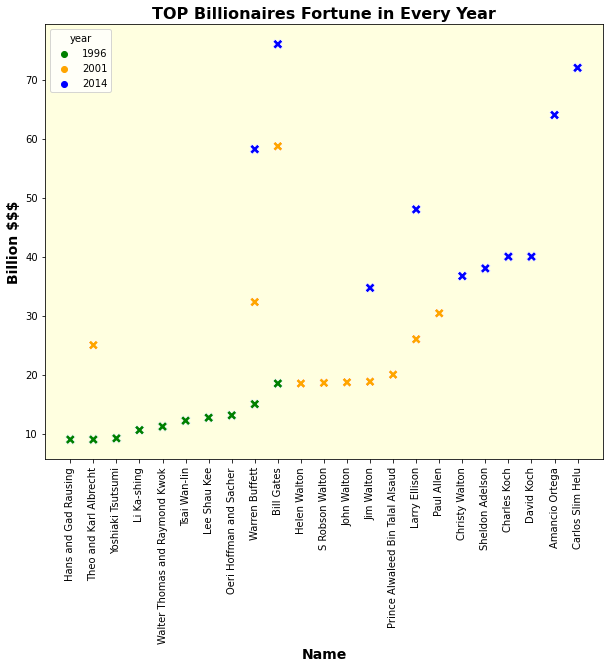

In [420]:
fig , ax = plt.subplots(figsize=[10,8])
ax = sns.scatterplot(x='name',y='wealth.worth in billions',marker='X' ,hue='year',data=sub,palette=['green', 'orange','blue' ], legend='full',s=100)
ax.set_xlabel('Name', fontdict={'size':14,'fontweight':'bold'})
ax.set_ylabel('Billion $$$', fontdict={'size':14,'fontweight':'bold'})
ax.set_title('TOP Billionaires Fortune in Every Year',fontdict={'size':16,'fontweight':'bold','horizontalalignment':'center'})
plt.xticks(rotation=90)
ax.set_facecolor('lightyellow')
plt.show()

Companies by rank and year of foundation and what industry is engaged in

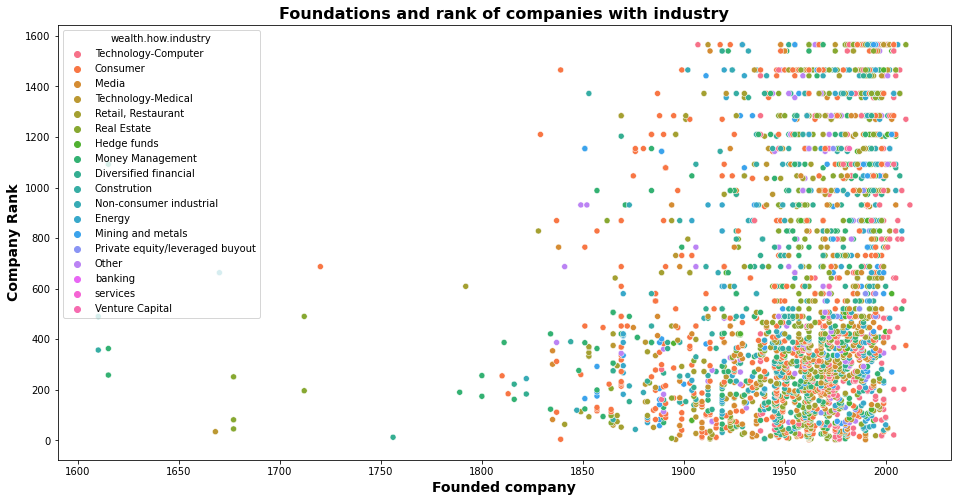

In [421]:
fig, ax = plt.subplots(figsize=[16,8])
sns.scatterplot(y='rank', x='company.founded',hue='wealth.how.industry',data=df, color = 'b')
ax.set_xlabel('Founded company', fontdict={'size':14,'fontweight':'bold'})
ax.set_ylabel('Company Rank', fontdict={'size':14,'fontweight':'bold'})
ax.set_title('Foundations and rank of companies with industry',fontdict={'size':16,'fontweight':'bold'})
plt.show()

How billionaires inherited their fortune and their age

In [422]:
df_inherited = df[['wealth.how.inherited','demographics.age', 'name','wealth.worth in billions']].groupby('wealth.how.inherited').max().reset_index()
df_inherited

,wealth.how.inherited,demographics.age,name,wealth.worth in billions
0,3rd generation,98,Winthrop Rockefeller,20.0
1,4th generation,88,"William Wrigley, Jr.",8.6
2,5th generation or longer,85,Yvonne Bauer,13.0
3,father,95,Yusuf Hamied,40.0
4,not inherited,96,Zygmunt Solorz-Zak,76.0
5,spouse/widow,92,Yoshiko Mori,36.7


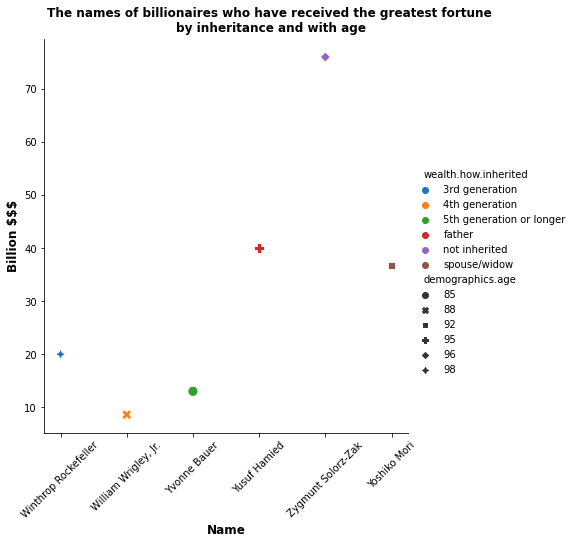

In [423]:
sns.relplot(x="name", y="wealth.worth in billions", hue="wealth.how.inherited", style="demographics.age", markers=True ,s=100,data=df_inherited, height=6)
plt.suptitle('The names of billionaires who have received the greatest fortune \nby inheritance and with age',fontsize=12, fontweight='bold', position=(0.49,1.05),horizontalalignment='center')
plt.xlabel('Name',fontdict={'size':12,'fontweight':'bold'})
plt.ylabel('Billion $$$',fontdict={'size':12,'fontweight':'bold'})
plt.xticks(rotation=45)
plt.show()

Men and women and their companies engaged in industry

In [502]:
df_g = df[['demographics.gender', 'wealth.how.industry']].groupby(['demographics.gender', 'wealth.how.industry']).size().reset_index(name='Count')
#df_g.filter(lambda x: x['name'].count() == len(x))
df_g

,demographics.gender,wealth.how.industry,Count
0,female,Constrution,15
1,female,Consumer,72
2,female,Diversified financial,12
3,female,Energy,3
4,female,Media,18
5,female,Mining and metals,10
6,female,Money Management,19
7,female,Non-consumer industrial,13
8,female,Other,7
9,female,Real Estate,25


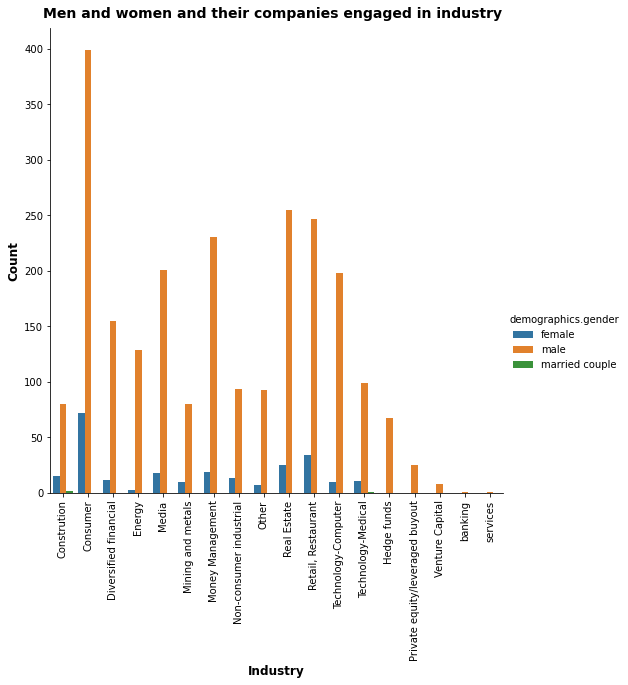

In [503]:
sns.catplot(x='wealth.how.industry',y='Count',hue='demographics.gender', kind='bar', data=df_g,height=7)
plt.suptitle('Men and women and their companies engaged in industry',fontsize=14, fontweight='bold', position=(0.43,1.02))
plt.xlabel('Industry',fontdict={'size':12,'fontweight':'bold'})
plt.ylabel('Count',fontdict={'size':12,'fontweight':'bold'})
plt.xticks(rotation=90)
plt.show()

TOP 15 Billionaires and their company

In [481]:
#df_m = df[['name', 'company.name','wealth.worth in billions']].groupby('company.name').max()#.sort_values('wealth.worth in billions',ascending=False)#.reset_index()#.head(15)
df_m = df[['name','company.name','wealth.worth in billions','year']].groupby('year')
df_m.filter(lambda x: x['wealth.worth in billions'].max() > 30.0)
#df_m

,name,company.name,wealth.worth in billions,year
1,Bill Gates,Microsoft,58.7,2001
2,Bill Gates,Microsoft,76.0,2014
4,Warren Buffett,Berkshire Hathaway,32.3,2001
5,Carlos Slim Helu,Telmex,72.0,2014
7,Paul Allen,Microsoft,30.4,2001
...,...,...,...,...
2609,Wu Chung-Yi,Tingyi,1.0,2014
2610,Wu Xiong,Biostime International Holdings,1.0,2014
2611,Yang Keng,Blue Ray Corp,1.0,2014
2612,Zdenek Bakala,Patria Finance,1.0,2014


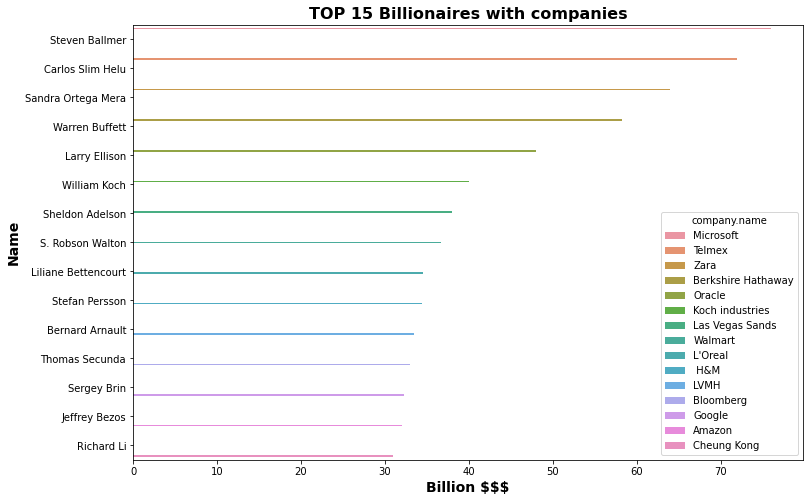

In [427]:
fig , ax = plt.subplots(figsize=[12,8])
ax =sns.barplot(hue='company.name', y='name',x='wealth.worth in billions',data=df_m)
ax.set_xlabel('Billion $$$', fontdict={'size':14,'fontweight':'bold'})
ax.set_ylabel('Name', fontdict={'size':14,'fontweight':'bold'})
ax.set_title('TOP 15 Billionaires with companies',fontdict={'size':16,'fontweight':'bold','horizontalalignment':'center'})
plt.show()

Number of people of different ages by gender

In [428]:
df_age = df[['demographics.age','name','demographics.gender']].groupby(['demographics.age','demographics.gender']).count().rename(columns = {'name':'Count'}).reset_index()
df_age

,demographics.age,demographics.gender,Count
0,12,male,1
1,21,male,1
2,24,female,1
3,24,male,1
4,28,male,2
5,29,male,4
6,30,male,4
7,31,male,5
8,32,female,2
9,32,male,2


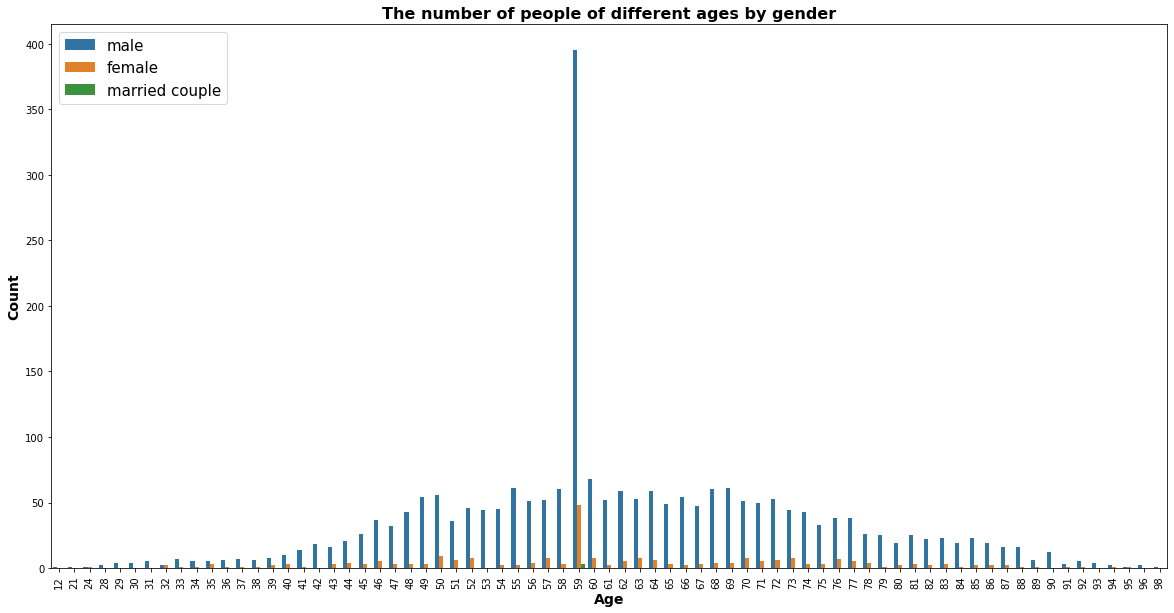

In [429]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.barplot(x='demographics.age',y='Count',hue = 'demographics.gender',data=df_age)
ax.set_xlabel('Age', fontdict={'size':14,'fontweight':'bold'})
ax.set_ylabel('Count', fontdict={'size':14,'fontweight':'bold'})
ax.set_title('The number of people of different ages by gender',fontdict={'size':16,'fontweight':'bold'})
plt.xticks(rotation=90)
plt.legend(loc='upper left', prop={'size': 15})
plt.show()

Some information about Kazakhstan Billionaires

Company owner by name and age

In [430]:
df_kz = df[df['location.country code'] == 'KAZ']
df_kz_s = df_kz.sort_values('demographics.age')
df_kz_s

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.country code,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
1955,Dinara Kulibaeva,988,2014,1923,Halyk Bank,owner,banking,privatization,46,female,Kazakhstan,KAZ,0.0,South Asia,privatized and resources,1.8,Financial,True,Money Management,not inherited,True,True
1986,Timur Kulibaev,988,2014,1923,Halyk Bank,owner,banking,privatization,47,male,Kazakhstan,KAZ,0.0,South Asia,privatized and resources,1.8,Financial,True,Money Management,not inherited,True,True
2055,Vladimir Kim,1078,2014,1930,Kazkhmys,investor,mining,privatization,53,male,Kazakhstan,KAZ,0.0,South Asia,privatized and resources,1.7,Resource Related,True,Mining and metals,not inherited,True,True
1758,Bulat Utemuratov,796,2014,1995,ATF Bank,founder,banking,new,56,male,Kazakhstan,KAZ,0.0,South Asia,privatized and resources,2.2,Resource Related,True,Mining and metals,not inherited,True,True
2011,Alijan Ibragimov,1046,2014,1994,Eurasion natural Resources Corporation,founder,metals,new,60,male,Kazakhstan,KAZ,0.0,South Asia,privatized and resources,1.7,Resource Related,True,Mining and metals,not inherited,True,True


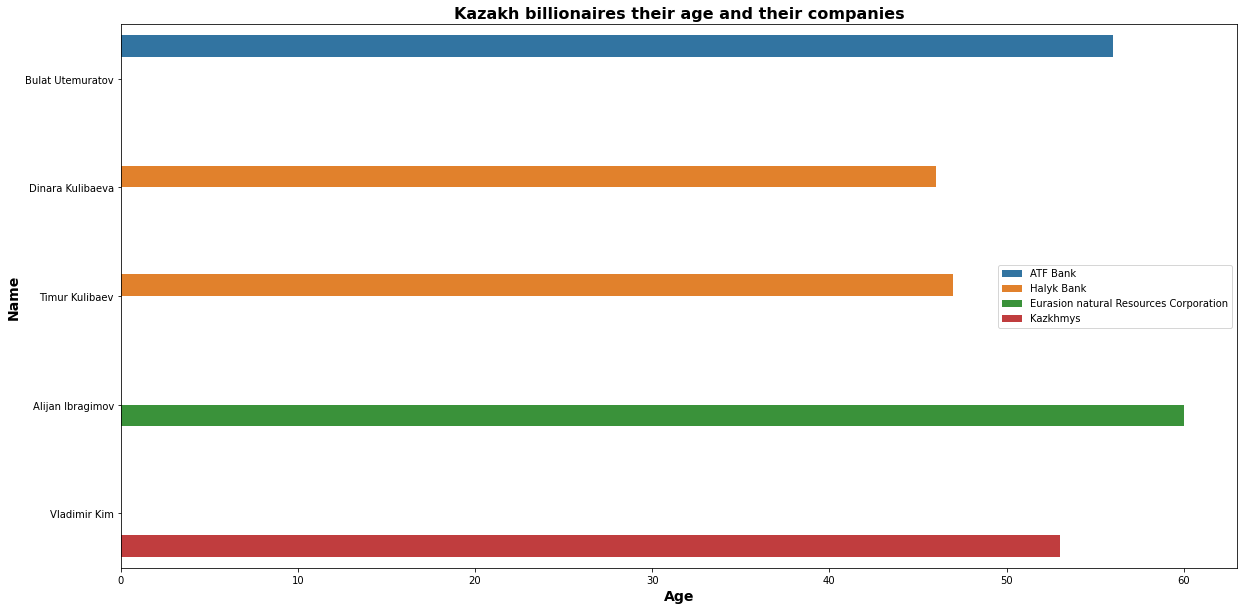

In [431]:
fig, ax = plt.subplots(figsize = [20,10])
sns.barplot(y='name', x='demographics.age', hue='company.name',data=df_kz)
ax.set_xlabel('Age', fontdict={'size':14,'fontweight':'bold'})
ax.set_ylabel('Name', fontdict={'size':14,'fontweight':'bold'})
ax.set_title('Kazakh billionaires their age and their companies',fontdict={'size':16,'fontweight':'bold'})
plt.legend(loc='right')
plt.show()

List of Kazakhstan billionaires by status and rank

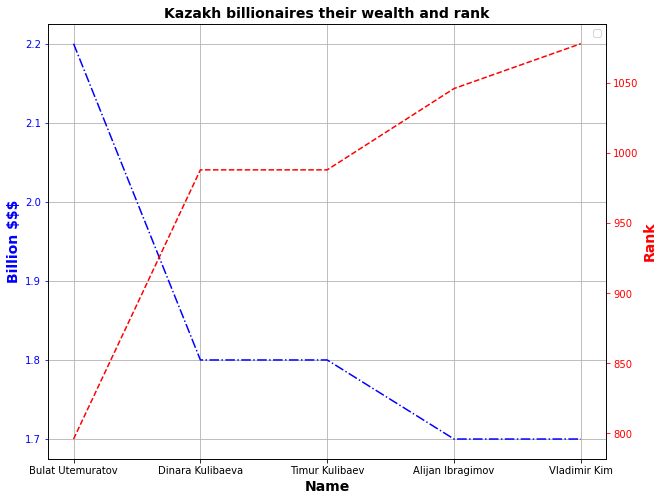

In [432]:
fig, ax = plt.subplots(figsize = [10,8])
ax.plot(df_kz['name'], df_kz['wealth.worth in billions'], linestyle='-.', color = 'b')
ax.set_xlabel('Name', fontdict={'size':14,'fontweight':'bold'})
ax.set_ylabel('Billion $$$', fontdict={'size':14,'fontweight':'bold'} ,color = 'b')
ax.set_title('Kazakh billionaires their wealth and rank',fontdict={'size':14,'fontweight':'bold'})
ax.tick_params('y', colors = 'b')

ax2 = ax.twinx()
ax2.plot(df_kz['name'], df_kz['rank'], linestyle='--', color = 'r')
ax2.set_ylabel('Rank', fontdict={'size':14,'fontweight':'bold'},color = 'r')
ax2.tick_params('y',colors = 'r')
ax.grid(True)

lines, handles = ax.get_legend_handles_labels()
lines2, handles2 = ax2.get_legend_handles_labels()

ax2.legend(lines + lines2, handles + handles2, loc = 'best')
plt.show()

Companies their foundation and type of engaged sector

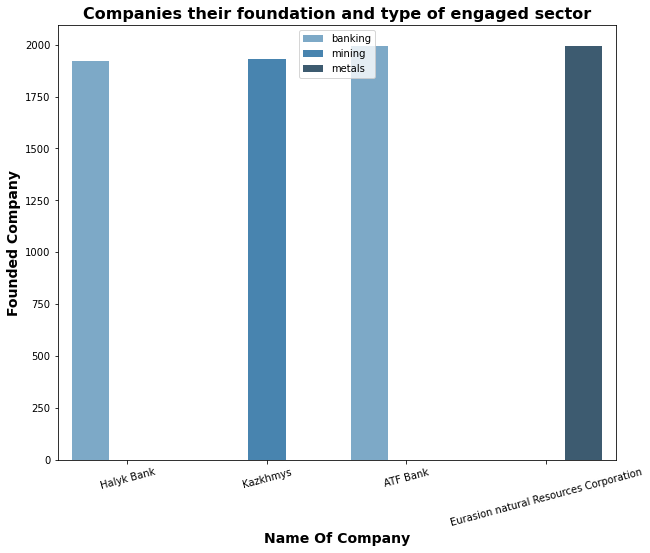

In [433]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.barplot(x='company.name', y='company.founded',hue='company.sector',data=df_kz_s,palette="Blues_d")
ax.set_xlabel('Name Of Company', fontdict={'size':14,'fontweight':'bold'})
ax.set_ylabel('Founded Company', fontdict={'size':14,'fontweight':'bold'})
ax.set_title('Companies their foundation and type of engaged sector',fontdict={'size':16,'fontweight':'bold'})
plt.legend(loc='upper center', prop={'size':10})
plt.xticks(rotation=15)
plt.show()

The End

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


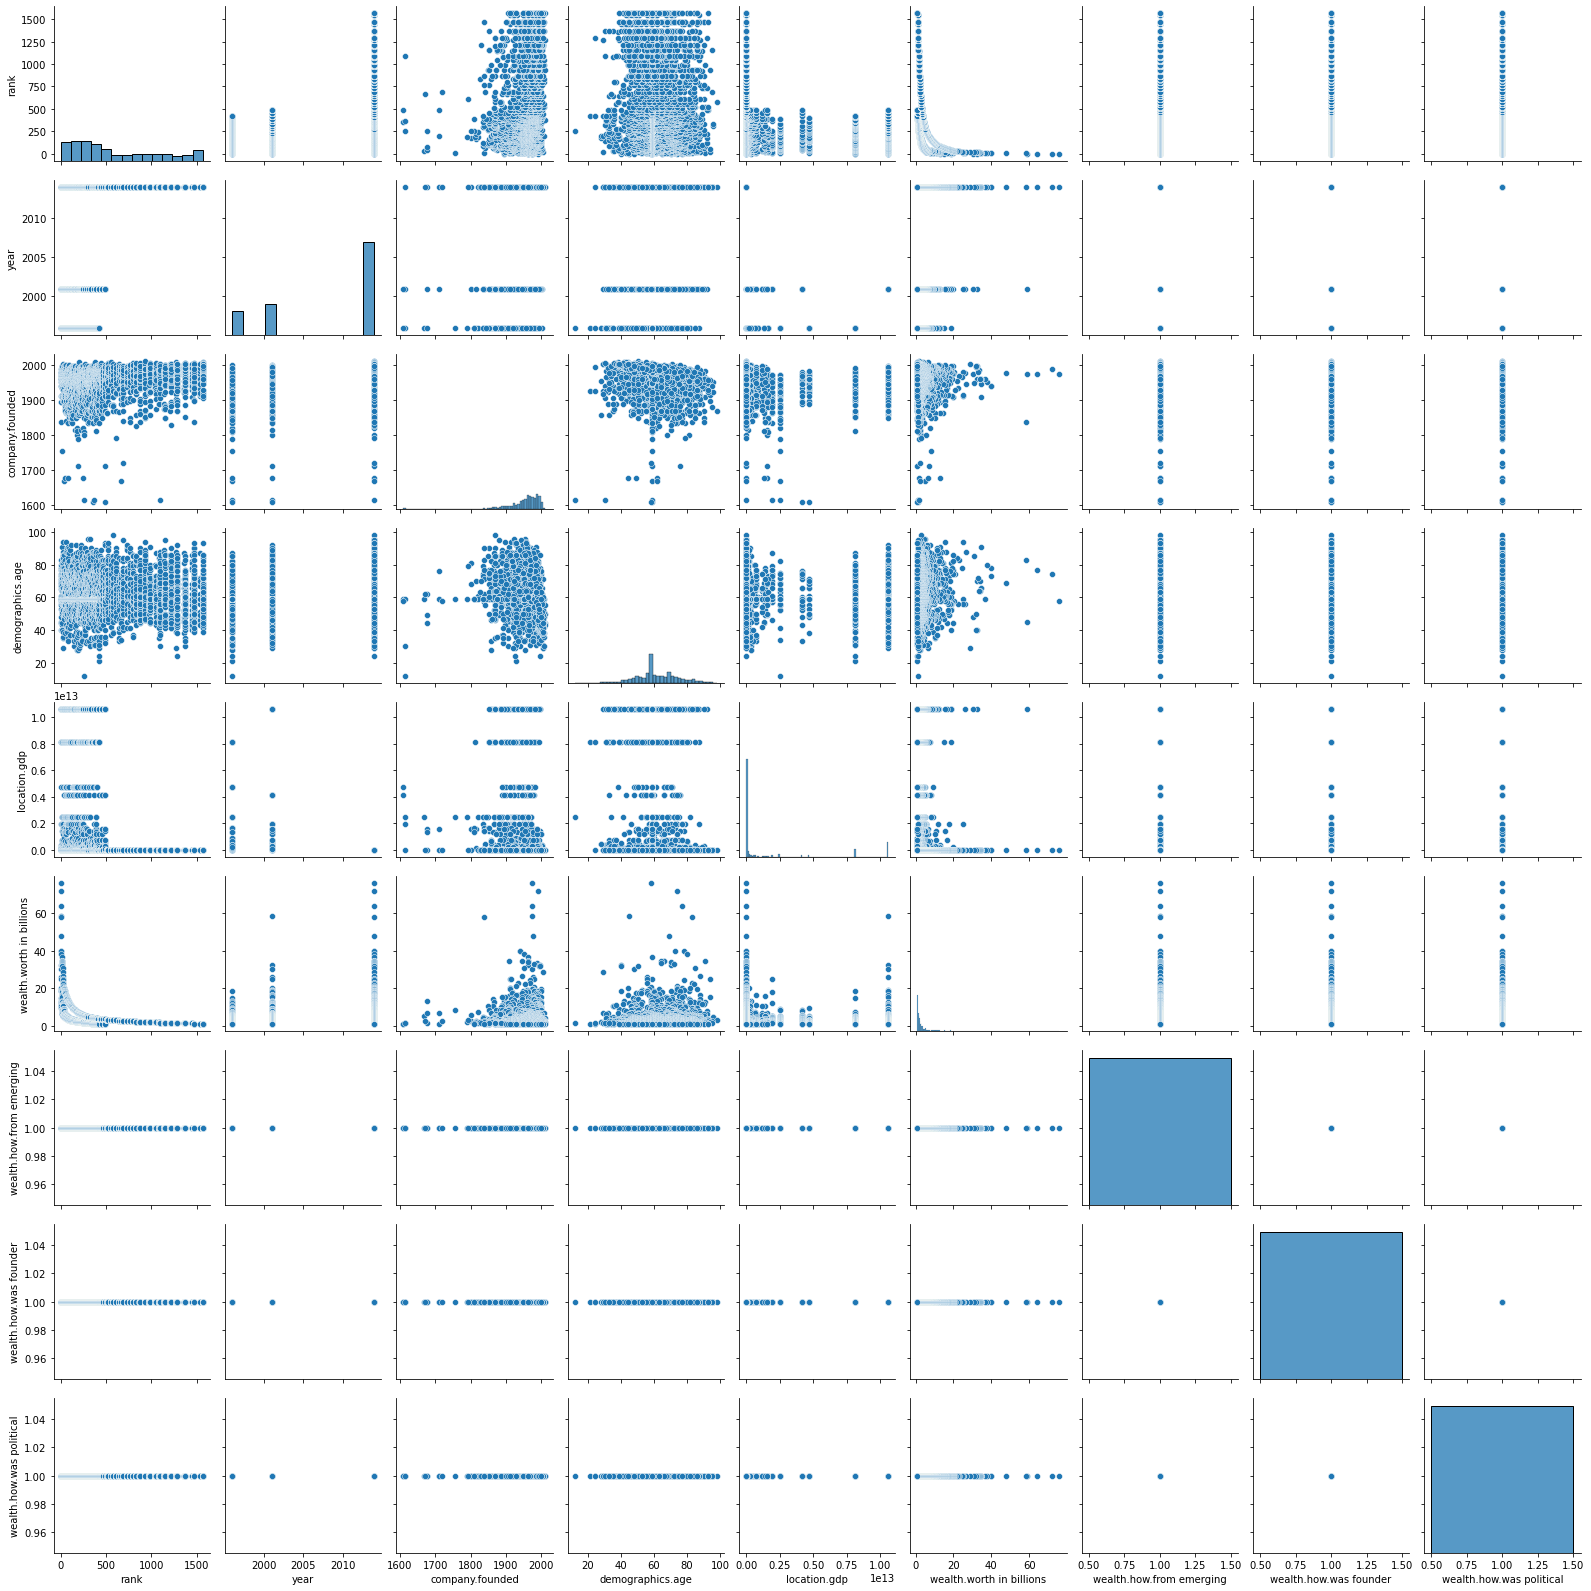

In [282]:
sns.pairplot(df)